Write a program to read the data from the following link, perform data analysis and answer the following questions
Note -
1. Write code comments wherever required for code understanding.

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Insights to be drawn -
- Get all the cars and their types that do not qualify for clean alternative fuel vehicle
- Get all TESLA cars with the model year, and model type made in Bothell City.
- Get all the cars that have an electric range of more than 100, and were made after 2015
- Draw plots to show the distribution between city and electric vehicle type

In [3]:
import requests as req
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [5]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [6]:
df.shape

(130443, 17)

### Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [7]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [8]:
not_qualify_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible']

In [9]:
not_qualify_cars_types = not_qualify_cars[['VIN (1-10)','Make', 'Model','Electric Vehicle Type']]

In [10]:
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(not_qualify_cars_types)

Cars and their types that do not qualify for clean alternative fuel vehicle:
        VIN (1-10)    Make    Model                   Electric Vehicle Type
6       3FA6P0PU1G    FORD   FUSION  Plug-in Hybrid Electric Vehicle (PHEV)
7       WA1F2AFY8P    AUDI     Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)
8       1FADP5CU0E    FORD    C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)
11      7SAYGDEF4N   TESLA  MODEL Y          Battery Electric Vehicle (BEV)
14      1FADP5FU4H    FORD    C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)
...            ...     ...      ...                                     ...
130437  WBA13AG06M     BMW     530E  Plug-in Hybrid Electric Vehicle (PHEV)
130438  7SAYGDEE6P   TESLA  MODEL Y          Battery Electric Vehicle (BEV)
130439  1N4BZ1CV7N  NISSAN     LEAF          Battery Electric Vehicle (BEV)
130440  5YJYGDEE8M   TESLA  MODEL Y          Battery Electric Vehicle (BEV)
130442  5YJ3E1EA5M   TESLA  MODEL 3          Battery Electric Vehicle (BEV)

[69892 row

### Get all TESLA cars with the model year, and model type made in Bothell City.

In [11]:
tesla_cars = df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')]

In [12]:
tesla_cars_Bothell = tesla_cars[['VIN (1-10)','Model Year', 'Model','City']]

In [13]:
print('All TESLA cars with the model year, and model type made in Bothell City.')
print(tesla_cars_Bothell)

All TESLA cars with the model year, and model type made in Bothell City.
        VIN (1-10)  Model Year    Model     City
39      5YJ3E1EA6L        2020  MODEL 3  Bothell
217     5YJ3E1EB9N        2022  MODEL 3  Bothell
218     7SAYGDEEXN        2022  MODEL Y  Bothell
222     5YJ3E1EB6J        2018  MODEL 3  Bothell
292     5YJXCBE40H        2017  MODEL X  Bothell
...            ...         ...      ...      ...
129778  5YJ3E1EB3K        2019  MODEL 3  Bothell
129954  5YJ3E1EB3M        2021  MODEL 3  Bothell
129976  5YJSA1S10E        2014  MODEL S  Bothell
130295  5YJ3E1EA8N        2022  MODEL 3  Bothell
130392  5YJ3E1EA9J        2018  MODEL 3  Bothell

[2407 rows x 4 columns]


### Get all the cars that have an electric range of more than 100, and were made after 2015

In [14]:
long_range_cars = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2014 )]

In [15]:
long_range_cars

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130418,5YJSA1E22F,King,Vashon,WA,98070.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,34.0,279480883,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


### Draw plots to show the distribution between city and electric vehicle type

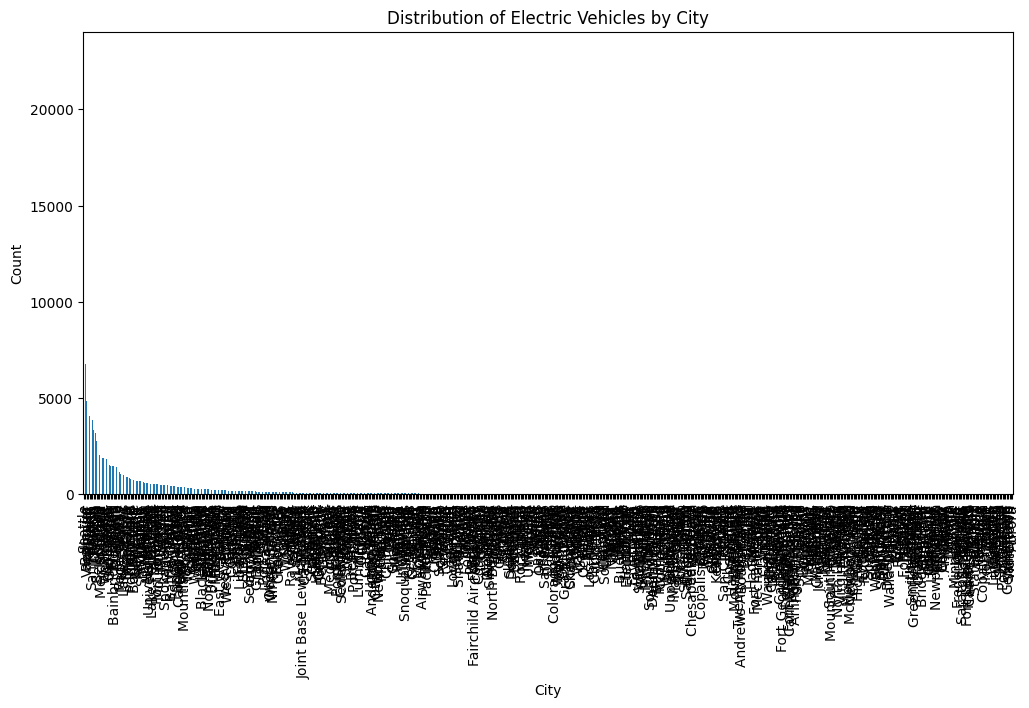

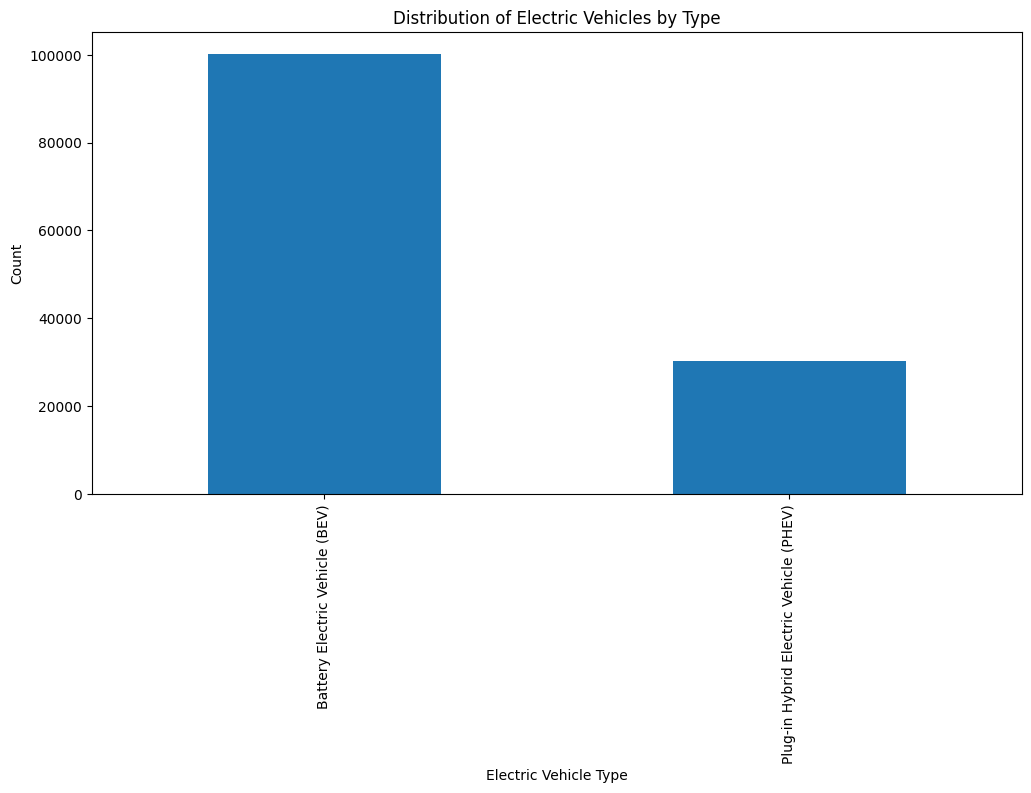

In [16]:
# Plot the distribution between city and electric vehicle type
plt.figure(figsize=(12, 6))
df['City'].value_counts().plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicles by City')
plt.show()

plt.figure(figsize=(12, 6))
df['Electric Vehicle Type'].value_counts().plot(kind='bar')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicles by Type')
plt.show()

In [17]:
df['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)